In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
lane_dev = ctrl.Antecedent(np.arange(-10, 11, 1), 'lane_dev')        # -10 (far left) to +10 (far right)
curvature = ctrl.Antecedent(np.arange(0, 11, 1), 'curvature')        # 0 = straight, 10 = sharp curve
obstacle = ctrl.Antecedent(np.arange(-10, 11, 1), 'obstacle')        # -10 (left), 0 (center), 10 (right)
steering = ctrl.Consequent(np.arange(-100, 101, 1), 'steering')      # -100 (sharp left), +100 (sharp right)

In [5]:
# Define membership functions for each variable

# Lane Deviation
lane_dev['left'] = fuzz.trimf(lane_dev.universe, [-10, -10, 0])
lane_dev['center'] = fuzz.trimf(lane_dev.universe, [-5, 0, 5])
lane_dev['right'] = fuzz.trimf(lane_dev.universe, [0, 10, 10])

# Road Curvature
curvature['straight'] = fuzz.trimf(curvature.universe, [0, 0, 3])
curvature['mild'] = fuzz.trimf(curvature.universe, [2, 5, 8])
curvature['sharp'] = fuzz.trimf(curvature.universe, [7, 10, 10])

# Obstacle Position
obstacle['left'] = fuzz.trimf(obstacle.universe, [-10, -10, -2])
obstacle['center'] = fuzz.trimf(obstacle.universe, [-3, 0, 3])
obstacle['right'] = fuzz.trimf(obstacle.universe, [2, 10, 10])

# Steering Adjustment
steering['sharp_left'] = fuzz.trimf(steering.universe, [-100, -100, -50])
steering['slight_left'] = fuzz.trimf(steering.universe, [-70, -30, 0])
steering['straight'] = fuzz.trimf(steering.universe, [-10, 0, 10])
steering['slight_right'] = fuzz.trimf(steering.universe, [0, 30, 70])
steering['sharp_right'] = fuzz.trimf(steering.universe, [50, 100, 100])


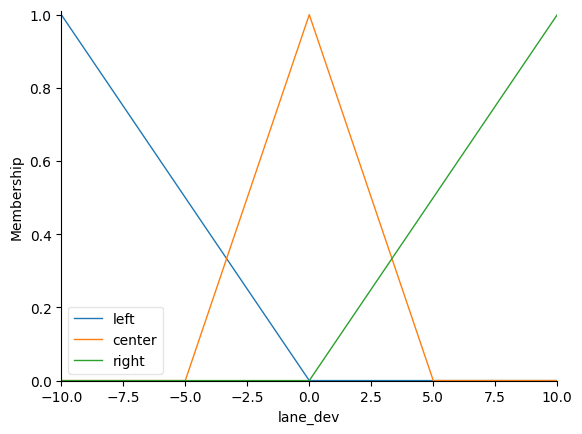

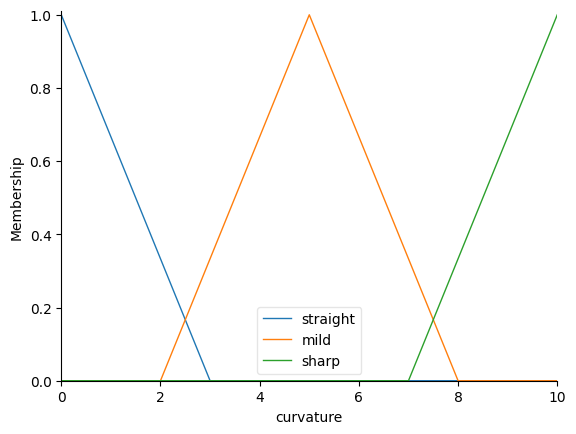

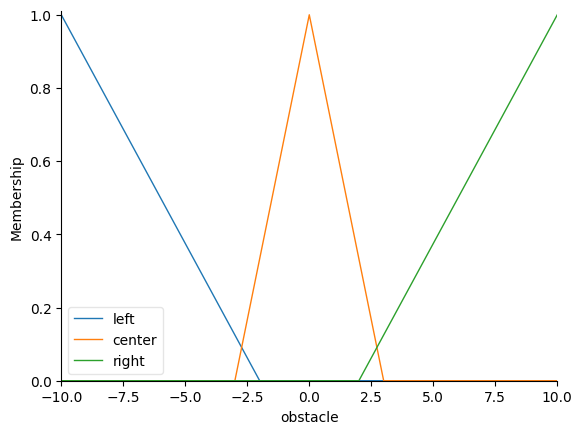

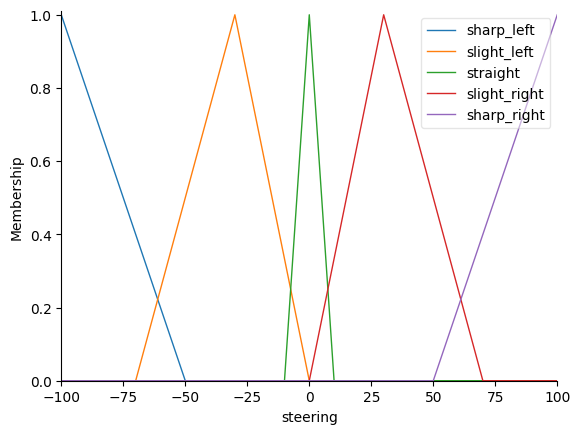

In [7]:
#Plot membership functions
lane_dev.view()
curvature.view()
obstacle.view()
steering.view()
plt.show()


In [8]:
# Define fuzzy rules (expanded)
rules = [

    # Lane-keeping logic
    ctrl.Rule(lane_dev['left'] & curvature['straight'], steering['slight_right']),
    ctrl.Rule(lane_dev['right'] & curvature['straight'], steering['slight_left']),
    ctrl.Rule(lane_dev['left'] & curvature['mild'], steering['slight_right']),
    ctrl.Rule(lane_dev['right'] & curvature['mild'], steering['slight_left']),
    ctrl.Rule(lane_dev['left'] & curvature['sharp'], steering['sharp_right']),
    ctrl.Rule(lane_dev['right'] & curvature['sharp'], steering['sharp_left']),
    ctrl.Rule(lane_dev['center'], steering['straight']),

    # Obstacle avoidance
    ctrl.Rule(obstacle['left'], steering['sharp_right']),
    ctrl.Rule(obstacle['right'], steering['sharp_left']),
    ctrl.Rule(obstacle['center'], steering['slight_right']),

    # Combined logic: curvature + obstacle
    ctrl.Rule(curvature['sharp'] & obstacle['right'], steering['sharp_left']),
    ctrl.Rule(curvature['sharp'] & obstacle['left'], steering['sharp_right']),
    ctrl.Rule(curvature['mild'] & obstacle['right'], steering['slight_left']),
    ctrl.Rule(curvature['mild'] & obstacle['left'], steering['slight_right']),
    ctrl.Rule(curvature['straight'] & obstacle['center'], steering['slight_right']),
]


In [9]:
# Apply rules to control system
steering_ctrl = ctrl.ControlSystem(rules)
steering_sim = ctrl.ControlSystemSimulation(steering_ctrl)

In [ ]:
# Test the system with sample input
steering_sim.input['lane_dev'] = -6       # Car is left of lane center
steering_sim.input['curvature'] = 1       # Road is straight
steering_sim.input['obstacle'] = 8        # Obstacle on the right

steering_sim.compute()
print(f"Steering Adjustment Output: {steering_sim.output['steering']:.2f}")


Steering Adjustment Output: -17.84


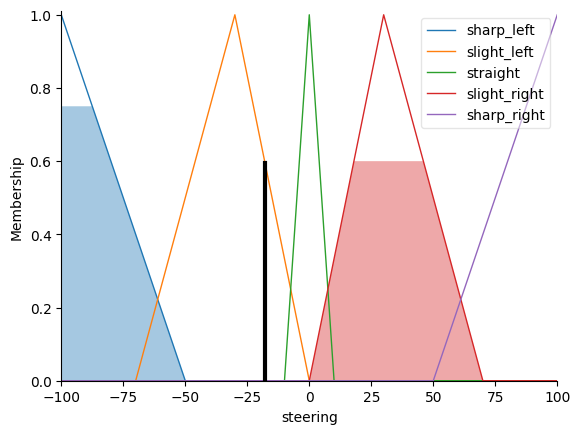

In [11]:
steering.view(sim=steering_sim)
plt.show()